In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pycaret

In [4]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [5]:
dataset.shape

(6000, 8)

In [6]:
dataset.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [8]:
data = dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4800, 8)
Unseen Data For Predictions: (1200, 8)


In [9]:
from pycaret.regression import *

In [10]:
reg = setup(data = data, target = 'Price', session_id=1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4800, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,625.5329,1904565.8447,1309.0566,0.9828,0.0659,0.0486,3.7050
1,Extreme Gradient Boosting,682.2139,1936094.3343,1365.5611,0.9819,0.0722,0.0537,0.5255
2,Extra Trees Regressor,729.6996,2047000.6472,1401.3788,0.9810,0.0788,0.0590,0.9475
3,Random Forest,740.8710,2396697.2395,1510.3251,0.9780,0.0798,0.0588,0.9121
4,Light Gradient Boosting Machine,748.5189,2776159.1335,1613.3465,0.9745,0.0770,0.0563,0.1807
5,Gradient Boosting Regressor,909.8534,3277191.7581,1767.5511,0.9696,0.1007,0.0769,0.6247
6,Decision Tree,988.3662,4430791.4520,2033.2542,0.9590,0.1071,0.0780,0.0314
7,Ridge Regression,2536.8345,14907956.0858,3816.7892,0.8584,0.6115,0.3001,0.0085
8,Lasso Least Angle Regression,2482.0746,15000192.5397,3826.1167,0.8580,0.6730,0.2863,0.0162
9,Lasso Regression,2536.8212,14979926.1769,3827.0878,0.8578,0.6120,0.2995,0.0718


In [17]:
cat = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,554.1137,1123911.6637,1060.1470,0.9881,0.0662,0.0492
1,532.3467,856890.0416,925.6836,0.9883,0.0639,0.0463
2,731.4433,2909729.1264,1705.7928,0.9795,0.0670,0.0501
3,606.9083,1564178.0275,1250.6710,0.9844,0.0631,0.0456
4,640.9818,1403353.2213,1184.6321,0.9850,0.0643,0.0494
5,585.1949,1048520.6377,1023.9730,0.9883,0.0632,0.0486
6,666.2212,1524198.6598,1234.5844,0.9856,0.0718,0.0508
7,676.5392,1506697.1894,1227.4759,0.9883,0.0625,0.0490
8,717.9185,6087387.8259,2467.2632,0.9527,0.0778,0.0517
9,543.6619,1020792.0542,1010.3425,0.9879,0.0592,0.0449


In [21]:
svm_model = create_model("svm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5802.7859,101277907.0927,10063.6925,-0.0765,0.6808,0.5461
1,5965.6112,85056772.5052,9222.6229,-0.1566,0.6843,0.5193
2,7273.5733,159809153.9865,12641.5645,-0.1277,0.7580,0.5600
3,6488.4474,117188393.4156,10825.3588,-0.1692,0.7065,0.4977
4,6765.5264,111554881.6805,10561.9544,-0.1956,0.7312,0.5388
5,5995.5007,97810477.6180,9889.9180,-0.0923,0.7003,0.5593
6,7014.0312,125931581.7610,11221.9242,-0.1927,0.7404,0.5229
7,7615.7017,156963736.0557,12528.5169,-0.2171,0.7776,0.5139
8,6769.1494,146178184.5820,12090.4171,-0.1365,0.7306,0.5365
9,5846.9358,93446744.2504,9666.7856,-0.1102,0.6747,0.5147


In [25]:
svm_tune = tune_model(svm_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5416.9284,94367252.6576,9714.2809,-0.0030,0.6263,0.4857
1,5584.1507,77191352.7450,8785.8610,-0.0496,0.6276,0.4731
2,6838.3287,150080488.9821,12250.7342,-0.0591,0.6999,0.5007
3,6088.0124,108417030.1965,10412.3499,-0.0817,0.6479,0.4504
4,6391.6337,103149782.8112,10156.2682,-0.1055,0.6753,0.4927
5,5615.9100,90047383.8178,9489.3300,-0.0056,0.6440,0.5039
6,6600.2645,116376654.6767,10787.8012,-0.1022,0.6801,0.4737
7,7202.2645,145981214.4038,12082.2686,-0.1319,0.7168,0.4670
8,6368.0504,136825226.7320,11697.2316,-0.0638,0.6723,0.4848
9,5461.3405,85804271.6938,9263.0595,-0.0194,0.6180,0.4632


In [26]:
cat_tune = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,622.0480,1302307.4376,1141.1869,0.9862,0.0734,0.0563
1,585.6298,1024825.8946,1012.3368,0.9861,0.0694,0.0510
2,744.6710,2578521.6518,1605.7776,0.9818,0.0699,0.0520
3,637.8026,1554098.0272,1246.6347,0.9845,0.0642,0.0479
4,743.7594,2395554.1663,1547.7578,0.9743,0.0733,0.0535
5,638.4900,1379891.5617,1174.6879,0.9846,0.0714,0.0520
6,692.4379,1440590.3596,1200.2460,0.9864,0.0792,0.0550
7,771.1909,2163902.3572,1471.0209,0.9832,0.0696,0.0537
8,728.6163,5122240.9451,2263.2368,0.9602,0.0786,0.0552
9,620.3109,1759971.5066,1326.6392,0.9791,0.0687,0.0499


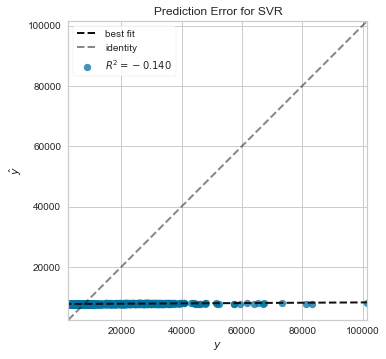

In [30]:
plot_model(svm_model,"error")

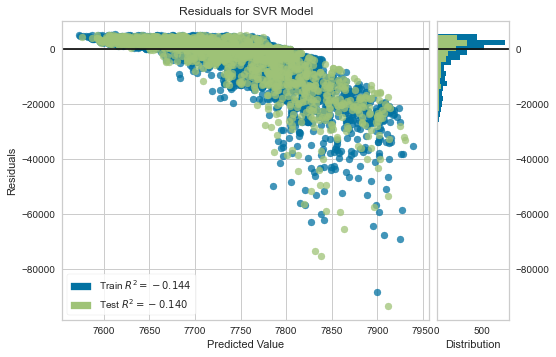

In [31]:
plot_model(svm_model)

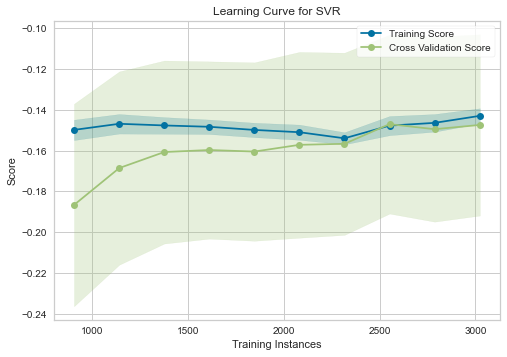

In [32]:
plot_model(svm_model,"learning")

In [34]:
plot_model(svm_model,"parameter")

,Parameters
C,1
cache_size,200
coef0,0
degree,3
epsilon,0.1
gamma,scale
kernel,rbf
max_iter,-1
shrinking,True
tol,0.001


In [38]:
evaluate_model(svm_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
predict_model(svm_tune);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,6152.5711,1.156358e+08,10753.4079,-0.0493,0.6562,0.4728


In [40]:
final_svmtune = finalize_model(svm_tune)

In [41]:
print(final_svmtune)

SVR(C=9.49, cache_size=200, coef0=0.0, degree=3, epsilon=1.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [43]:
predict_model(final_svmtune);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,5935.02,1.114354e+08,10556.2988,-0.0112,0.6273,0.4419


In [44]:
unseen_predictions = predict_model(final_svmtune, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.22,Very Good,E,VS2,EX,EX,GIA,9475,7820.5269
1,0.90,Very Good,E,SI1,VG,VG,GIA,4054,6114.5675
2,0.90,Fair,D,VS2,VG,VG,GIA,4277,6992.2886
3,1.09,Good,D,IF,VG,G,GIA,15795,7414.6537
4,2.02,Good,F,VS2,EX,VG,GIA,27643,8807.1719
